# 制約付き最適化

参考：
* [機械学習のための連続最適化](https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E9%80%A3%E7%B6%9A%E6%9C%80%E9%81%A9%E5%8C%96-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%83%95%E3%82%A7%E3%83%83%E3%82%B7%E3%83%A7%E3%83%8A%E3%83%AB%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E9%87%91%E6%A3%AE-%E6%95%AC%E6%96%87/dp/406152920X) 9章以降


## 等式制約とラグランジュの未定乗数法

次の最適化問題を扱います．
$$
\min_{x \in \mathbb{R}^n} f(x) \quad \text{ s.t. } g_i(x) = 0,  \quad i=i, \dots, p
$$

以降では$p < n$とし，$f, g_1, \dots, g_n$は全て微分可能とします．

上の制約付き最適化問題について，その局所最適解$x^*$が満たすべき性質を考えます．
簡単のため，等式制約が１つの場合を考えましょう．
つまり，

$$
\min_{x \in \mathbb{R}^n} f(x) \quad \text{ s.t. } g_1(x) = 0
$$

ここで，１次元パラメータ$t\in \mathbb{R}$から実行可能解への写像$t\mapsto x(t)$を考えましょう．
$x(t)$は$t$に関して微分可能で$x(0)=x^*$とします．このとき$x(t)$は実行可能解であり，$g_1(x(t))=0$なので，
$$
\nabla g_1(x^*)^\top \frac{dx}{dt}(0) = 0
$$
が成り立ちます．また，$f(x(t))$は$x(0)$で極小値をとるので，
$$
\nabla f(x^*)^\top \frac{dx}{dt}(0) = 0
$$
が成り立ちます．

よって，$\nabla g_1(x^*)$に直交する任意の$\frac{dx}{dt}(0)$に対して，$\nabla f(x^*)$は直交します．
つまり，$\nabla g_1(x^*) \neq 0$のとき，$\nabla f(x^*) + \lambda_1 \nabla g_1(x^*)=0$が成り立ちます．

丁寧に書くと次を得ます

---

**1次の必要条件**

$f, g_1, \dots, g_p$は一回連続微分可能とします．
局所最適解を$x^*$として，$\nabla g_1(x^*), \dots, \nabla g_p(x^*)$は一次独立とします．このとき，$\lambda_1^*, \dots, \lambda_p^*$が存在して，

$$
\begin{aligned}
&\nabla f(x^*) + \sum^p_{i=1} \lambda_i^* \nabla g_i (x^*)=0\\
&g_i(x^*) = 0
\end{aligned}
$$
が成り立ちます．

---

この１次の必要条件を満たすパラメータ$(x^*, \lambda^*)$は$(x, \lambda)$に関する１次方程式の解とみなせます．
これは方程式が$n+p$本あるので解を持つことが期待でき，特にこの変数$\lambda$を**ラグランジュ乗数**といいます．

ラグランジュ関数を

$$
L(x, \lambda) = f(x) + \sum^p_{i=1}\lambda_i g_i(x)
$$
とすると，１次の必要条件は

$$
\begin{aligned}
\frac{\partial L}{\partial x_i} (x^*, \lambda^*) = 0, \quad i = 1, \dots, n\\
\frac{\partial L}{\partial \lambda_j} (x^*, \lambda^*) = 0, \quad j = 1, \dots, p
\end{aligned}
$$

と等価です．次のラグランジュ関数についての線型方程式を解くことで最適解の候補（停留点）を得る方法を，**ラグランジュの未定乗数法**といいます．


## 不等式制約

次の最適化問題を扱います．

$$
\min_{x} f(x) \quad \text{ s.t. } g_i(x) < 0, \quad i=1, \dots, p
$$

この問題の局所最適解を$x^*$とします．このとき，以下の２つの状況が考えられます．
* $g_1(x^*)\leq 0$を等号で満たしているとき: この不等式制約を等式制約$g_1(x)=0$で置き換えても$x^*$は局所最適解です．
* $g_1(x^*) < 0$のとき: 制約$g_1(x) \leq 0$がなくても$x^*$は局所解になっているので，上記の不等式制約を除いた問題を考えても同じです．

よって，局所最適解は，等式制約で置き換えても良い不等式制約と，そもそも不等式制約を取り除いても良制約に分けることができます．
このとき，次の定義が便利です：

---

**有効制約式**

$g_i(x)=0$となる制約式を有効制約式といいます．有効制約式の添字の集合を$I(x)=\{i\in \{1, \dots, p\} \mid g_i(x) = 0\}$と書きます．

---

簡単のため，制約式が１つの場合について考えてみましょう．

$$
\min_{x} f(x) \quad \text{ s.t. } g_1(x) < 0
$$

この局所解を$x^*$, 実行可能領域を$S=\{x \in \mathbb{R}^n \mid g_1(x) \leq 0\}$とします．
このとき，近傍$B(x^*, \varepsilon)$が存在して，任意の$x\in S\cup B(x^*, \varepsilon)$について，$f(x^*) \leq f(x)$が成り立ちます．

---

**$g_1(x^*) < 0$のとき（下の図参照）**

関数$g_1$の連続性と，$g_1(x^*)<0$から，$x^*$の近傍の点はすべて$g_1(x)<0$を満たします．
よって，十分小さい$\varepsilon$を取ると，
$B(x^*, \varepsilon) \cup S = B(x^*, \varepsilon)$となり，任意の$x\in B(x^*, \varepsilon)$に対して$f(x^*) \leq f(x)$が成り立ちます．
したがって

$$
\nabla f(x^*)=0
$$
です．

---

---

**$g_1(x^*) = 0$のとき**

$x^*$は等式付き最適化問題

$$
\min_{x} f(x) \quad \text{ s.t. } g_1(x) = 0
$$

の局所解なので，最初の議論から，$\lambda_1^*\in \mathbb{R}$が存在して，

$$
\nabla f(x^*)+\lambda_1^* \nabla g_1(x^*)=0
$$

が成り立ちます．この$\lambda_1$の符号が$\lambda_1 \geq 0$に成ることは簡単に確かめられます（教科書p.161参照）

---

まとめると，

$$
\begin{aligned}
&\nabla f(x^*) + \lambda_1^* \nabla g_1(x^*) = 0\\
&g_1(x^*) \leq 0\\
&\lambda_1^* \geq 0\\
&\lambda_1^* g_1(x^*) = 0\\
\end{aligned}
$$

が成り立ちます．これを**KKT条件**（制約が一つのときの）といいます．


(-1.0, 4.0)

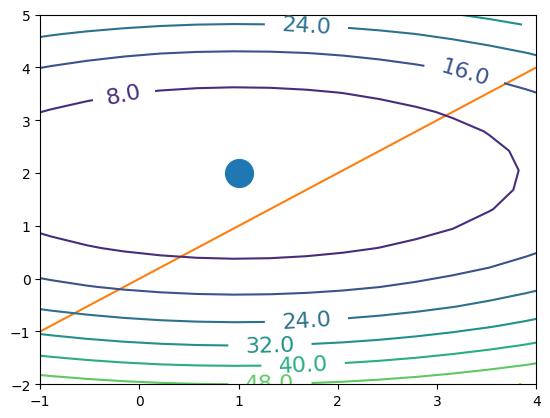

In [24]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.linspace(-2, 5, 20)
y = np.linspace(-2, 5, 20)

plt.plot(1, 2, marker="o", markersize=20)
plt.plot(x, y)

xs, ys = np.meshgrid(x, y)
zs = (xs - 1) ** 2 + 3 * (ys - 2) ** 2
ax = plt.contour(xs, ys, zs)
ax.clabel(fmt='%1.1f', fontsize=16) 

plt.xlim([-1, 4])
plt.xlim([-1, 4])

In [18]:
x.shape

(20, 20)